# Sentimen Analisis Project Dicoding

* Nama : Andi Engku Putribuana
* Email : andiengku1922@gmail.com
* id.dicoding : putribuana

---



# Import Library

In [160]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from scipy import stats
from collections import Counter

In [161]:
import pandas as pd
pd.options.mode.chained_assignment = None
import numpy as np
seed = 0
np.random.seed(seed)
import matplotlib.pyplot as plt
import seaborn as sns

import datetime as dt
import re
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

!pip install sastrawi
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

from wordcloud import WordCloud

In [162]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [163]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Loading Dataset

In [164]:
ulasan_x = pd.read_csv("/content/drive/MyDrive/Dicoding - Machine Learning/Sentimen Analysis Aplikasi X/ulasan_x.csv")
ulasan_x.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,cc7b2753-0c9b-43bd-98bd-4c55edb98d06,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g,"Apps ini aneh bangeeet...kadang tiba-tiba loading kayak gk ada sinyal padahal sinyal lancar... mohon kepada pihak twitter untuk diperhatikan. Terima kasih 2024 twitter sudah berubah jadi X Masalahnya tetep sama,ngebug sama loading terus kayak yang gak ada sinyal... bener-bener app aneh..",1,194,10.62.1-release.0,2024-10-10 17:55:21,NaN,NaN,10.62.1-release.0
1,283022e0-95b3-48ae-8b8c-5064b3696d69,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g,"Semenjak jadi X kalau di beranda suka ke refresh sendiri, kesell sih belum sempat lihat berita lain malah ke refresh, dan sekarang kalau lihat gambar/video harus loading lamaaaaa, gw kira wifi gw lag, gw tes download file, ig, tiktok lancar semua...gimana nih Elon Musk, mending balikin format Twitter yg dulu aja, gk ribet + ni aplikasi semakin diupdate malah tmbah aneh, gw paling ga suka fitur auto scroll saat lihat video, dan lebih buruknya adalah fitur ini tidak bisa di matikan😮‍💨",1,4045,10.61.1-release.0,2024-10-08 09:11:45,NaN,NaN,10.61.1-release.0
2,b562087d-1465-4b70-9847-c92f6a5a1b9e,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g,"Fitur autoscrolling video cukup mengganggu, kembalikan fitur x seperti sediakala orang orang lebih menyukai tampilan teks dengan video yang berulang. Orang mengenal twitter dan x karena ciri khasnya text based apk bukan video based dan bukan copycat tiktok atau instagram",1,2336,10.54.2-release.0,2024-08-19 01:34:09,NaN,NaN,10.54.2-release.0
3,12528742-76a5-4997-8f56-69863f468241,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g,Hello (●’◡’●)ﾉ. Ini tolong di perbaiki. Soalnya akuku suka keluar sendiri gitu. Maksudnya tuh kayak... Pas lagi asik² nge scroll trus aku keluar apk dulu liat² apk lain. Nah.. Beberapa menit kemudian aku tuh buka x lagi... Tapi malah akunya tuh keluar gitu.. Ini bukan sekali duakali. Tapi udah beberapa kali. Jadi pliss tolong di perbaiki 🙏,3,507,10.55.1-release.0,2024-08-27 14:46:28,NaN,NaN,10.55.1-release.0
4,993bc9be-5fd9-442b-a2fa-55b4c6052ae3,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g,"jaringan bagus, wifi bagus tapi kenapa loading video bahkan 10menit lebih tidak ada pergerakan sama sekali. masih sama sampai sekarang, kondisinya jaringan wifi bagus, bahkan provider juga jaringan internetnya bagus, untuk buka apps selain ini sangat lancar, why? c'mon",1,1083,10.55.1-release.0,2024-08-23 04:55:07,NaN,NaN,10.55.1-release.0


In [165]:
ulasan_x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18000 entries, 0 to 17999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   reviewId              18000 non-null  object 
 1   userName              18000 non-null  object 
 2   userImage             18000 non-null  object 
 3   content               18000 non-null  object 
 4   score                 18000 non-null  int64  
 5   thumbsUpCount         18000 non-null  int64  
 6   reviewCreatedVersion  13190 non-null  object 
 7   at                    18000 non-null  object 
 8   replyContent          0 non-null      float64
 9   repliedAt             0 non-null      float64
 10  appVersion            13190 non-null  object 
dtypes: float64(2), int64(2), object(7)
memory usage: 1.5+ MB


### Data Cleaning

In [166]:
ulasan_x.duplicated().sum()

0

In [167]:
ulasan_x.isna().sum()

,0
reviewId,0
userName,0
userImage,0
content,0
score,0
thumbsUpCount,0
reviewCreatedVersion,4810
at,0
replyContent,18000
repliedAt,18000


In [168]:
# Pisahkan kolom 'at' menjadi 'review_date' dan 'review_time'
ulasan_x['review_date'] = pd.to_datetime(ulasan_x['at']).dt.date
ulasan_x['review_time'] = pd.to_datetime(ulasan_x['at']).dt.time

# Tampilkan hasilnya
print(ulasan_x)

                                   reviewId         userName  \
0      cc7b2753-0c9b-43bd-98bd-4c55edb98d06  Pengguna Google   
1      283022e0-95b3-48ae-8b8c-5064b3696d69  Pengguna Google   
2      b562087d-1465-4b70-9847-c92f6a5a1b9e  Pengguna Google   
3      12528742-76a5-4997-8f56-69863f468241  Pengguna Google   
4      993bc9be-5fd9-442b-a2fa-55b4c6052ae3  Pengguna Google   
...                                     ...              ...   
17995  0f50531b-b2ba-48da-b8ba-f52a7e7a1363  Pengguna Google   
17996  c87572df-2b8d-4bf7-b1ce-d0687f184f0d  Pengguna Google   
17997  96b29cc8-98e6-41bb-88f3-2dca59bd0381  Pengguna Google   
17998  53d2ce0a-6ef0-42cf-9596-9e228bd7302c  Pengguna Google   
17999  9d940b21-dba3-4e7f-96e4-1af860436a53  Pengguna Google   

                                                                                                                      userImage  \
0      https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7Nb

In [169]:
ulasan_x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18000 entries, 0 to 17999
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   reviewId              18000 non-null  object 
 1   userName              18000 non-null  object 
 2   userImage             18000 non-null  object 
 3   content               18000 non-null  object 
 4   score                 18000 non-null  int64  
 5   thumbsUpCount         18000 non-null  int64  
 6   reviewCreatedVersion  13190 non-null  object 
 7   at                    18000 non-null  object 
 8   replyContent          0 non-null      float64
 9   repliedAt             0 non-null      float64
 10  appVersion            13190 non-null  object 
 11  review_date           18000 non-null  object 
 12  review_time           18000 non-null  object 
dtypes: float64(2), int64(2), object(9)
memory usage: 1.8+ MB


In [170]:
ulasan_x = ulasan_x.drop(['at', 'replyContent','repliedAt', 'reviewCreatedVersion'], axis=1)

In [171]:
ulasan_x['review_date'] = pd.to_datetime(ulasan_x['review_date'], format='%d-%m-%Y')

In [172]:
ulasan_x['appVersion'] = ulasan_x['appVersion'].str.replace(r'-release\.\d+$', '', regex=True)

print(ulasan_x)

                                   reviewId         userName  \
0      cc7b2753-0c9b-43bd-98bd-4c55edb98d06  Pengguna Google   
1      283022e0-95b3-48ae-8b8c-5064b3696d69  Pengguna Google   
2      b562087d-1465-4b70-9847-c92f6a5a1b9e  Pengguna Google   
3      12528742-76a5-4997-8f56-69863f468241  Pengguna Google   
4      993bc9be-5fd9-442b-a2fa-55b4c6052ae3  Pengguna Google   
...                                     ...              ...   
17995  0f50531b-b2ba-48da-b8ba-f52a7e7a1363  Pengguna Google   
17996  c87572df-2b8d-4bf7-b1ce-d0687f184f0d  Pengguna Google   
17997  96b29cc8-98e6-41bb-88f3-2dca59bd0381  Pengguna Google   
17998  53d2ce0a-6ef0-42cf-9596-9e228bd7302c  Pengguna Google   
17999  9d940b21-dba3-4e7f-96e4-1af860436a53  Pengguna Google   

                                                                                                                      userImage  \
0      https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7Nb

Ide imputasi: nilai appVersion yang hilang akan diisi dengan modus dari appVersion dari tiga hari (hari itu, hari sebelumnya, dan hari sesudahnya)

In [173]:
# Fungsi untuk imputasi appVersion
def impute_app_version(row):
    # Ambil tanggal review
    review_date = row['review_date']

    # Cari modus appVersion pada hari itu, hari sebelumnya, dan hari sesudahnya
    combined_modes = pd.concat([
        ulasan_x[ulasan_x['review_date'] == pd.to_datetime(review_date)]['appVersion'],
        ulasan_x[ulasan_x['review_date'] == pd.to_datetime(review_date) - pd.Timedelta(days=1)]['appVersion'],
        ulasan_x[ulasan_x['review_date'] == pd.to_datetime(review_date) + pd.Timedelta(days=1)]['appVersion']
    ]).mode()

    # Jika modus ditemukan, kembalikan modus pertama
    if not combined_modes.empty:
        return combined_modes[0]
    else:
        return row['appVersion']

# Imputasi appVersion dengan fungsi yang dibuat
ulasan_x['appVersion'] = ulasan_x.apply(impute_app_version, axis=1)

print(f"Missing values in appVersion: {ulasan_x['appVersion'].isnull().sum()}")

Missing values in appVersion: 1


In [174]:
ulasan_x['appVersion'].value_counts().sort_index()

,count
appVersion,
10.0.0,122
10.1.0,136
10.10.0,32
10.11.0,41
10.12.0,42
...,...
9.94.0,48
9.95.0,180
9.96.0,73


In [175]:
ulasan_x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18000 entries, 0 to 17999
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   reviewId       18000 non-null  object        
 1   userName       18000 non-null  object        
 2   userImage      18000 non-null  object        
 3   content        18000 non-null  object        
 4   score          18000 non-null  int64         
 5   thumbsUpCount  18000 non-null  int64         
 6   appVersion     17999 non-null  object        
 7   review_date    18000 non-null  datetime64[ns]
 8   review_time    18000 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(6)
memory usage: 1.2+ MB


### Preprocessing

In [176]:
def cleaningText(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text) # remove mentions
    text = re.sub(r'#[A-Za-z0-9]+', '', text) # remove hashtag
    text = re.sub(r'RT[\s]', '', text) # remove RT
    text = re.sub(r"http\S+", '', text) # remove link
    text = re.sub(r'[0-9]+', '', text) # remove numbers
    text = re.sub(r'[^\w\s]', '', text) # remove numbers


    text = text.replace('\n', ' ') # replace new line into space
    text = text.translate(str.maketrans('', '', string.punctuation)) # remove all punctuations
    text = text.strip(' ') # remove characters space from both left and right text
    return text

def casefoldingText(text): # Converting all the characters in a text into lower case
    text = text.lower()
    return text

def tokenizingText(text): # Tokenizing or splitting a string, text into a list of tokens
    text = word_tokenize(text)
    return text

def filteringText(text): # Remove stopwors in a text
    listStopwords = set(stopwords.words('indonesian'))
    listStopwords1 = set(stopwords.words('english'))
    listStopwords.update(listStopwords1)
    listStopwords.update(['iya','yaa','gak','nya','na','sih','ku',"di","ga","ya","gaa","loh","kah","woi","woii","woy"])
    filtered = []
    for txt in text:
        if txt not in listStopwords:
            filtered.append(txt)
    text = filtered
    return text

def stemmingText(text): # Reducing a word to its word stem that affixes to suffixes and prefixes or to the roots of words
    # Membuat objek stemmer
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()

    # Memecah teks menjadi daftar kata
    words = text.split()

    # Menerapkan stemming pada setiap kata dalam daftar
    stemmed_words = [stemmer.stem(word) for word in words]

    # Menggabungkan kata-kata yang telah distem
    stemmed_text = ' '.join(stemmed_words)

    return stemmed_text

    return stemmed_text
def toSentence(list_words): # Convert list of words into sentence
    sentence = ' '.join(word for word in list_words)
    return sentence

In [177]:
slangwords = {"@": "di", "abis": "habis", "wtb": "beli", "masi": "masih", "wts": "jual", "wtt": "tukar", "bgt": "banget", "maks": "maksimal", "plisss": "tolong", "bgttt": "banget", "indo": "indonesia", "bgtt": "banget", "ad": "ada", "rv": "redvelvet", "plis": "tolong", "pls": "tolong", "cr": "sumber", "cod": "bayar ditempat", "adlh": "adalah", "afaik": "as far as i know", "ahaha": "haha", "aj": "saja", "ajep-ajep": "dunia gemerlap", "ak": "saya", "akika": "aku", "akkoh": "aku", "akuwh": "aku", "alay": "norak", "alow": "halo", "ambilin": "ambilkan", "ancur": "hancur", "anjrit": "anjing", "anter": "antar", "ap2": "apa-apa", "apasih": "apa sih", "apes": "sial", "aps": "apa", "aq": "saya", "aquwh": "aku", "asbun": "asal bunyi", "aseekk": "asyik", "asekk": "asyik", "asem": "asam", "aspal": "asli tetapi palsu", "astul": "asal tulis", "ato": "atau", "au ah": "tidak mau tahu", "awak": "saya", "ay": "sayang", "ayank": "sayang", "b4": "sebelum", "bakalan": "akan", "bandes": "bantuan desa", "bangedh": "banget", "banpol": "bantuan polisi", "banpur": "bantuan tempur", "basbang": "basi", "bcanda": "bercanda", "bdg": "bandung", "begajulan": "nakal", "beliin": "belikan", "bencong": "banci", "bentar": "sebentar", "ber3": "bertiga", "beresin": "membereskan", "bete": "bosan", "beud": "banget", "bg": "abang", "bgmn": "bagaimana", "bgt": "banget", "bijimane": "bagaimana", "bintal": "bimbingan mental", "bkl": "akan", "bknnya": "bukannya", "blegug": "bodoh", "blh": "boleh", "bln": "bulan", "blum": "belum", "bnci": "benci", "bnran": "yang benar", "bodor": "lucu", "bokap": "ayah", "boker": "buang air besar", "bokis": "bohong", "boljug": "boleh juga", "bonek": "bocah nekat", "boyeh": "boleh", "br": "baru", "brg": "bareng", "bro": "saudara laki-laki", "bru": "baru", "bs": "bisa", "bsen": "bosan", "bt": "buat", "btw": "ngomong-ngomong", "buaya": "tidak setia", "bubbu": "tidur", "bubu": "tidur", "bumil": "ibu hamil", "bw": "bawa", "bwt": "buat", "byk": "banyak", "byrin": "bayarkan", "cabal": "sabar", "cadas": "keren", "calo": "makelar", "can": "belum", "capcus": "pergi", "caper": "cari perhatian", "ce": "cewek", "cekal": "cegah tangkal", "cemen": "penakut", "cengengesan": "tertawa", "cepet": "cepat", "cew": "cewek", "chuyunk": "sayang", "cimeng": "ganja", "cipika cipiki": "cium pipi kanan cium pipi kiri", "ciyh": "sih", "ckepp": "cakep", "ckp": "cakep", "cmiiw": "correct me if i'm wrong", "cmpur": "campur", "cong": "banci", "conlok": "cinta lokasi", "cowwyy": "maaf", "cp": "siapa", "cpe": "capek", "cppe": "capek", "cucok": "cocok", "cuex": "cuek", "cumi": "Cuma miscall", "cups": "culun", "curanmor": "pencurian kendaraan bermotor", "curcol": "curahan hati colongan", "cwek": "cewek", "cyin": "cinta", "d": "di", "dah": "deh", "dapet": "dapat", "de": "adik", "dek": "adik", "demen": "suka", "deyh": "deh", "dgn": "dengan", "diancurin": "dihancurkan", "dimaafin": "dimaafkan", "dimintak": "diminta", "disono": "di sana", "dket": "dekat", "dkk": "dan kawan-kawan", "dll": "dan lain-lain", "dlu": "dulu", "dngn": "dengan", "dodol": "bodoh", "doku": "uang", "dongs": "dong", "dpt": "dapat", "dri": "dari", "drmn": "darimana", "drtd": "dari tadi", "dst": "dan seterusnya", "dtg": "datang", "duh": "aduh", "duren": "durian", "ed": "edisi", "egp": "emang gue pikirin", "eke": "aku", "elu": "kamu", "emangnya": "memangnya", "emng": "memang", "endak": "tidak", "enggak": "tidak", "envy": "iri", "ex": "mantan", "fax": "facsimile", "fifo": "first in first out", "folbek": "follow back", "fyi": "sebagai informasi", "gaada": "tidak ada uang", "gag": "tidak", "gaje": "tidak jelas", "gak papa": "tidak apa-apa", "gan": "juragan", "gaptek": "gagap teknologi", "gatek": "gagap teknologi", "gawe": "kerja", "gbs": "tidak bisa", "gebetan": "orang yang disuka", "geje": "tidak jelas", "gepeng": "gelandangan dan pengemis", "ghiy": "lagi", "gile": "gila", "gimana": "bagaimana", "gino": "gigi nongol", "githu": "gitu", "gj": "tidak jelas", "gmana": "bagaimana", "gn": "begini", "goblok": "bodoh", "golput": "golongan putih", "gowes": "mengayuh sepeda", "gpny": "tidak punya", "gr": "gede rasa", "gretongan": "gratisan", "gtau": "tidak tahu", "gua": "saya", "guoblok": "goblok", "gw": "saya", "ha": "tertawa", "haha": "tertawa", "hallow": "halo", "hankam": "pertahanan dan keamanan", "hehe": "he", "helo": "halo", "hey": "hai", "hlm": "halaman", "hny": "hanya", "hoax": "isu bohong", "hr": "hari", "hrus": "harus", "hubdar": "perhubungan darat", "huff": "mengeluh", "hum": "rumah", "humz": "rumah", "ilang": "hilang", "ilfil": "tidak suka", "imho": "in my humble opinion", "imoetz": "imut", "item": "hitam", "itungan": "hitungan", "iye": "iya", "ja": "saja", "jadiin": "jadi", "jaim": "jaga image", "jayus": "tidak lucu", "jdi": "jadi", "jem": "jam", "jga": "juga", "jgnkan": "jangankan", "jir": "anjing", "jln": "jalan", "jomblo": "tidak punya pacar", "jubir": "juru bicara", "jutek": "galak", "k": "ke", "kab": "kabupaten", "kabor": "kabur", "kacrut": "kacau", "kadiv": "kepala divisi", "kagak": "tidak", "kalo": "kalau", "kampret": "sialan", "kamtibmas": "keamanan dan ketertiban masyarakat", "kamuwh": "kamu", "kanwil": "kantor wilayah", "karna": "karena", "kasubbag": "kepala subbagian", "katrok": "kampungan", "kayanya": "kayaknya", "kbr": "kabar", "kdu": "harus", "kec": "kecamatan", "kejurnas": "kejuaraan nasional", "kekeuh": "keras kepala", "kel": "kelurahan", "kemaren": "kemarin", "kepengen": "mau", "kepingin": "mau", "kepsek": "kepala sekolah", "kesbang": "kesatuan bangsa", "kesra": "kesejahteraan rakyat", "ketrima": "diterima", "kgiatan": "kegiatan", "kibul": "bohong", "kimpoi": "kawin", "kl": "kalau", "klianz": "kalian", "kloter": "kelompok terbang", "klw": "kalau", "km": "kamu", "kmps": "kampus", "kmrn": "kemarin", "knal": "kenal", "knp": "kenapa", "kodya": "kota madya", "komdis": "komisi disiplin", "komsov": "komunis sovyet", "kongkow": "kumpul bareng teman-teman", "kopdar": "kopi darat", "korup": "korupsi", "kpn": "kapan", "krenz": "keren", "krm": "kirim", "kt": "kita", "ktmu": "ketemu", "ktr": "kantor", "kuper": "kurang pergaulan", "kw": "imitasi", "kyk": "seperti", "la": "lah", "lam": "salam", "lamp": "lampiran", "lanud": "landasan udara", "latgab": "latihan gabungan", "lebay": "berlebihan", "leh": "boleh", "lelet": "lambat", "lemot": "lambat", "lgi": "lagi", "lgsg": "langsung", "liat": "lihat", "litbang": "penelitian dan pengembangan", "lmyn": "lumayan", "lo": "kamu", "loe": "kamu", "lola": "lambat berfikir", "louph": "cinta", "low": "kalau", "lp": "lupa", "luber": "langsung, umum, bebas, dan rahasia", "luchuw": "lucu", "lum": "belum", "luthu": "lucu", "lwn": "lawan", "maacih": "terima kasih", "mabal": "bolos", "macem": "macam", "macih": "masih", "maem": "makan", "magabut": "makan gaji buta", "maho": "homo", "mak jang": "kaget", "maksain": "memaksa", "malem": "malam", "mam": "makan", "maneh": "kamu", "maniez": "manis", "mao": "mau", "masukin": "masukkan", "melu": "ikut", "mepet": "dekat sekali", "mgu": "minggu", "migas": "minyak dan gas bumi", "mikol": "minuman beralkohol", "miras": "minuman keras", "mlah": "malah", "mngkn": "mungkin", "mo": "mau", "mokad": "mati", "moso": "masa", "mpe": "sampai", "msk": "masuk", "mslh": "masalah", "mt": "makan teman", "mubes": "musyawarah besar", "mulu": "melulu", "mumpung": "selagi", "munas": "musyawarah nasional", "muntaber": "muntah dan berak", "musti": "mesti", "muupz": "maaf", "mw": "now watching", "n": "dan", "nanam": "menanam", "nanya": "bertanya", "napa": "kenapa", "napi": "narapidana", "napza": "narkotika, alkohol, psikotropika, dan zat adiktif ", "narkoba": "narkotika, psikotropika, dan obat terlarang", "nasgor": "nasi goreng", "nda": "tidak", "ndiri": "sendiri", "ne": "ini", "nekolin": "neokolonialisme", "nembak": "menyatakan cinta", "ngabuburit": "menunggu berbuka puasa", "ngaku": "mengaku", "ngambil": "mengambil", "nganggur": "tidak punya pekerjaan", "ngapah": "kenapa", "ngaret": "terlambat", "ngasih": "memberikan", "ngebandel": "berbuat bandel", "ngegosip": "bergosip", "ngeklaim": "mengklaim", "ngeksis": "menjadi eksis", "ngeles": "berkilah", "ngelidur": "menggigau", "ngerampok": "merampok", "ngga": "tidak", "ngibul": "berbohong", "ngiler": "mau", "ngiri": "iri", "ngisiin": "mengisikan", "ngmng": "bicara", "ngomong": "bicara", "ngubek2": "mencari-cari", "ngurus": "mengurus", "nie": "ini", "nih": "ini", "niyh": "nih", "nmr": "nomor", "nntn": "nonton", "nobar": "nonton bareng", "np": "now playing", "ntar": "nanti", "ntn": "nonton", "numpuk": "bertumpuk", "nutupin": "menutupi", "nyari": "mencari", "nyekar": "menyekar", "nyicil": "mencicil", "nyoblos": "mencoblos", "nyokap": "ibu", "ogah": "tidak mau", "ol": "online", "ongkir": "ongkos kirim", "oot": "out of topic", "org2": "orang-orang", "ortu": "orang tua", "otda": "otonomi daerah", "otw": "on the way, sedang di jalan", "pacal": "pacar", "pake": "pakai", "pala": "kepala", "pansus": "panitia khusus", "parpol": "partai politik", "pasutri": "pasangan suami istri", "pd": "pada", "pede": "percaya diri", "pelatnas": "pemusatan latihan nasional", "pemda": "pemerintah daerah", "pemkot": "pemerintah kota", "pemred": "pemimpin redaksi", "penjas": "pendidikan jasmani", "perda": "peraturan daerah", "perhatiin": "perhatikan", "pesenan": "pesanan", "pgang": "pegang", "pi": "tapi", "pilkada": "pemilihan kepala daerah", "pisan": "sangat", "pk": "penjahat kelamin", "plg": "paling", "pmrnth": "pemerintah", "polantas": "polisi lalu lintas", "ponpes": "pondok pesantren", "pp": "pulang pergi", "prg": "pergi", "prnh": "pernah", "psen": "pesan", "pst": "pasti", "pswt": "pesawat", "pw": "posisi nyaman", "qmu": "kamu", "rakor": "rapat koordinasi", "ranmor": "kendaraan bermotor", "re": "reply", "ref": "referensi", "rehab": "rehabilitasi", "rempong": "sulit", "repp": "balas", "restik": "reserse narkotika", "rhs": "rahasia", "rmh": "rumah", "ru": "baru", "ruko": "rumah toko", "rusunawa": "rumah susun sewa", "ruz": "terus", "saia": "saya", "salting": "salah tingkah", "sampe": "sampai", "samsek": "sama sekali", "sapose": "siapa", "satpam": "satuan pengamanan", "sbb": "sebagai berikut", "sbh": "sebuah", "sbnrny": "sebenarnya", "scr": "secara", "sdgkn": "sedangkan", "sdkt": "sedikit", "se7": "setuju", "sebelas dua belas": "mirip", "sembako": "sembilan bahan pokok", "sempet": "sempat", "sendratari": "seni drama tari", "sgt": "sangat", "shg": "sehingga", "siech": "sih", "sikon": "situasi dan kondisi", "sinetron": "sinema elektronik", "siramin": "siramkan", "sj": "saja", "skalian": "sekalian", "sklh": "sekolah", "skt": "sakit", "slesai": "selesai", "sll": "selalu", "slma": "selama", "slsai": "selesai", "smpt": "sempat", "smw": "semua", "sndiri": "sendiri", "soljum": "sholat jumat", "songong": "sombong", "sory": "maaf", "sosek": "sosial-ekonomi", "sotoy": "sok tahu", "spa": "siapa", "sppa": "siapa", "spt": "seperti", "srtfkt": "sertifikat", "stiap": "setiap", "stlh": "setelah", "suk": "masuk", "sumpek": "sempit", "syg": "sayang", "t4": "tempat", "tajir": "kaya", "tau": "tahu", "taw": "tahu", "td": "tadi", "tdk": "tidak", "teh": "kakak perempuan", "telat": "terlambat", "telmi": "telat berpikir", "temen": "teman", "tengil": "menyebalkan", "tepar": "terkapar", "tggu": "tunggu", "tgu": "tunggu", "thankz": "terima kasih", "thn": "tahun", "tilang": "bukti pelanggaran", "tipiwan": "TvOne", "tks": "terima kasih", "tlp": "telepon", "tls": "tulis", "tmbah": "tambah", "tmen2": "teman-teman", "tmpah": "tumpah", "tmpt": "tempat", "tngu": "tunggu", "tnyta": "ternyata", "tokai": "tai", "toserba": "toko serba ada", "tpi": "tapi", "trdhulu": "terdahulu", "trima": "terima kasih", "trm": "terima", "trs": "terus", "trutama": "terutama", "ts": "penulis", "tst": "tahu sama tahu", "ttg": "tentang", "tuch": "tuh", "tuir": "tua", "tw": "tahu", "u": "kamu", "ud": "sudah", "udah": "sudah", "ujg": "ujung", "ul": "ulangan", "unyu": "lucu", "uplot": "unggah", "urang": "saya", "usah": "perlu", "utk": "untuk", "valas": "valuta asing", "w/": "dengan", "wadir": "wakil direktur", "wamil": "wajib militer", "warkop": "warung kopi", "warteg": "warung tegal", "wat": "buat", "wkt": "waktu", "wtf": "what the fuck", "xixixi": "tertawa", "ya": "iya", "yap": "iya", "yaudah": "ya sudah", "yawdah": "ya sudah", "yg": "yang", "yl": "yang lain", "yo": "iya", "yowes": "ya sudah", "yup": "iya", "7an": "tujuan", "ababil": "abg labil", "acc": "accord", "adlah": "adalah", "adoh": "aduh", "aha": "tertawa", "aing": "saya", "aja": "saja", "ajj": "saja", "aka": "dikenal juga sebagai", "akko": "aku", "akku": "aku", "akyu": "aku", "aljasa": "asal jadi saja", "ama": "sama", "ambl": "ambil", "anjir": "anjing", "ank": "anak", "ap": "apa", "apaan": "apa", "ape": "apa", "aplot": "unggah", "apva": "apa", "aqu": "aku", "asap": "sesegera mungkin", "aseek": "asyik", "asek": "asyik", "aseknya": "asyiknya", "asoy": "asyik", "astrojim": "astagfirullahaladzim", "ath": "kalau begitu", "atuh": "kalau begitu", "ava": "avatar", "aws": "awas", "ayang": "sayang", "ayok": "ayo", "bacot": "banyak bicara", "bales": "balas", "bangdes": "pembangunan desa", "bangkotan": "tua", "banpres": "bantuan presiden", "bansarkas": "bantuan sarana kesehatan", "bazis": "badan amal, zakat, infak, dan sedekah", "bcoz": "karena", "beb": "sayang", "bejibun": "banyak", "belom": "belum", "bener": "benar", "ber2": "berdua", "berdikari": "berdiri di atas kaki sendiri", "bet": "banget", "beti": "beda tipis", "beut": "banget", "bgd": "banget", "bgs": "bagus", "bhubu": "tidur", "bimbuluh": "bimbingan dan penyuluhan", "bisi": "kalau-kalau", "bkn": "bukan", "bl": "beli", "blg": "bilang", "blm": "belum", "bls": "balas", "bnchi": "benci", "bngung": "bingung", "bnyk": "banyak", "bohay": "badan aduhai", "bokep": "porno", "bokin": "pacar", "bole": "boleh", "bolot": "bodoh", "bonyok": "ayah ibu", "bpk": "bapak", "brb": "segera kembali", "brngkt": "berangkat", "brp": "berapa", "brur": "saudara laki-laki", "bsa": "bisa", "bsk": "besok", "bu_bu": "tidur", "bubarin": "bubarkan", "buber": "buka bersama", "bujubune": "luar biasa", "buser": "buru sergap", "bwhn": "bawahan", "byar": "bayar", "byr": "bayar", "c8": "chat", "cabut": "pergi", "caem": "cakep", "cama-cama": "sama-sama", "cangcut": "celana dalam", "cape": "capek", "caur": "jelek", "cekak": "tidak ada uang", "cekidot": "coba lihat", "cemplungin": "cemplungkan", "ceper": "pendek", "ceu": "kakak perempuan", "cewe": "cewek", "cibuk": "sibuk", "cin": "cinta", "ciye": "cie", "ckck": "ck", "clbk": "cinta lama bersemi kembali", "cmpr": "campur", "cnenk": "senang", "congor": "mulut", "cow": "cowok", "coz": "karena", "cpa": "siapa", "gokil": "gila", "gombal": "suka merayu", "gpl": "tidak pakai lama", "gpp": "tidak apa-apa", "gretong": "gratis", "gt": "begitu", "gtw": "tidak tahu", "gue": "saya", "guys": "teman-teman", "gws": "cepat sembuh", "haghaghag": "tertawa", "hakhak": "tertawa", "handak": "bahan peledak", "hansip": "pertahanan sipil", "hellow": "halo", "helow": "halo", "hi": "hai", "hlng": "hilang", "hnya": "hanya", "houm": "rumah", "hrs": "harus", "hubad": "hubungan angkatan darat", "hubla": "perhubungan laut", "huft": "mengeluh", "humas": "hubungan masyarakat", "idk": "saya tidak tahu", "ilfeel": "tidak suka", "imba": "jago sekali", "imoet": "imut", "info": "informasi", "itung": "hitung", "isengin": "bercanda", "iyala": "iya lah", "iyo": "iya", "jablay": "jarang dibelai", "jadul": "jaman dulu", "jancuk": "anjing", "jd": "jadi", "jdikan": "jadikan", "jg": "juga", "jgn": "jangan", "jijay": "jijik", "jkt": "jakarta", "jnj": "janji", "jth": "jatuh", "jurdil": "jujur adil", "jwb": "jawab", "ka": "kakak", "kabag": "kepala bagian", "kacian": "kasihan", "kadit": "kepala direktorat", "kaga": "tidak", "kaka": "kakak", "kamtib": "keamanan dan ketertiban", "kamuh": "kamu", "kamyu": "kamu", "kapt": "kapten", "kasat": "kepala satuan", "kasubbid": "kepala subbidang", "kau": "kamu", "kbar": "kabar", "kcian": "kasihan", "keburu": "terlanjur", "kedubes": "kedutaan besar", "kek": "seperti", "keknya": "kayaknya", "keliatan": "kelihatan", "keneh": "masih", "kepikiran": "terpikirkan", "kepo": "mau tahu urusan orang", "kere": "tidak punya uang", "kesian": "kasihan", "ketauan": "ketahuan", "keukeuh": "keras kepala", "khan": "kan", "kibus": "kaki busuk", "kk": "kakak", "klian": "kalian", "klo": "kalau", "kluarga": "keluarga", "klwrga": "keluarga", "kmari": "kemari", "kmpus": "kampus", "kn": "kan", "knl": "kenal", "knpa": "kenapa", "kog": "kok", "kompi": "komputer", "komtiong": "komunis Tiongkok", "konjen": "konsulat jenderal", "koq": "kok", "kpd": "kepada", "kptsan": "keputusan", "krik": "garing", "krn": "karena", "ktauan": "ketahuan", "ktny": "katanya", "kudu": "harus", "kuq": "kok", "ky": "seperti", "kykny": "kayanya", "laka": "kecelakaan", "lambreta": "lambat", "lansia": "lanjut usia", "lapas": "lembaga pemasyarakatan", "lbur": "libur", "lekong": "laki-laki", "lg": "lagi", "lgkp": "lengkap", "lht": "lihat", "linmas": "perlindungan masyarakat", "lmyan": "lumayan", "lngkp": "lengkap", "loch": "loh", "lol": "tertawa", "lom": "belum", "loupz": "cinta", "lowh": "kamu", "lu": "kamu", "luchu": "lucu", "luff": "cinta", "luph": "cinta", "lw": "kamu", "lwt": "lewat", "maaciw": "terima kasih", "mabes": "markas besar", "macem-macem": "macam-macam", "madesu": "masa depan suram", "maen": "main", "mahatma": "maju sehat bersama", "mak": "ibu", "makasih": "terima kasih", "malah": "bahkan", "malu2in": "memalukan", "mamz": "makan", "manies": "manis", "mantep": "mantap", "markus": "makelar kasus", "mba": "mbak", "mending": "lebih baik", "mgkn": "mungkin", "mhn": "mohon", "miker": "minuman keras", "milis": "mailing list", "mksd": "maksud", "mls": "malas", "mnt": "minta", "moge": "motor gede", "mokat": "mati", "mosok": "masa", "msh": "masih", "mskpn": "meskipun", "msng2": "masing-masing", "muahal": "mahal", "muker": "musyawarah kerja", "mumet": "pusing", "muna": "munafik", "munaslub": "musyawarah nasional luar biasa", "musda": "musyawarah daerah", "muup": "maaf", "muuv": "maaf", "nal": "kenal", "nangis": "menangis", "naon": "apa", "napol": "narapidana politik", "naq": "anak", "narsis": "bangga pada diri sendiri", "nax": "anak", "ndak": "tidak", "ndut": "gendut", "nekolim": "neokolonialisme", "nelfon": "menelepon", "ngabis2in": "menghabiskan", "ngakak": "tertawa", "ngambek": "marah", "ngampus": "pergi ke kampus", "ngantri": "mengantri", "ngapain": "sedang apa", "ngaruh": "berpengaruh", "ngawur": "berbicara sembarangan", "ngeceng": "kumpul bareng-bareng", "ngeh": "sadar", "ngekos": "tinggal di kos", "ngelamar": "melamar", "ngeliat": "melihat", "ngemeng": "bicara terus-terusan", "ngerti": "mengerti", "nggak": "tidak", "ngikut": "ikut", "nginep": "menginap", "ngisi": "mengisi", "ngmg": "bicara", "ngocol": "lucu", "ngomongin": "membicarakan", "ngumpul": "berkumpul", "ni": "ini", "nyasar": "tersesat", "nyariin": "mencari", "nyiapin": "mempersiapkan", "nyiram": "menyiram", "nyok": "ayo", "o/": "oleh", "ok": "ok", "priksa": "periksa", "pro": "profesional", "psn": "pesan", "psti": "pasti", "puanas": "panas", "qmo": "kamu", "qt": "kita", "rame": "ramai", "raskin": "rakyat miskin", "red": "redaksi", "reg": "register", "rejeki": "rezeki", "renstra": "rencana strategis", "reskrim": "reserse kriminal", "sni": "sini", "somse": "sombong sekali", "sorry": "maaf", "sosbud": "sosial-budaya", "sospol": "sosial-politik", "sowry": "maaf", "spd": "sepeda", "sprti": "seperti", "spy": "supaya", "stelah": "setelah", "subbag": "subbagian", "sumbangin": "sumbangkan", "sy": "saya", "syp": "siapa", "tabanas": "tabungan pembangunan nasional", "tar": "nanti", "taun": "tahun", "tawh": "tahu", "tdi": "tadi", "te2p": "tetap", "tekor": "rugi", "telkom": "telekomunikasi", "telp": "telepon", "temen2": "teman-teman", "tengok": "menjenguk", "terbitin": "terbitkan", "tgl": "tanggal", "thanks": "terima kasih", "thd": "terhadap", "thx": "terima kasih", "tipi": "TV", "tkg": "tukang", "tll": "terlalu", "tlpn": "telepon", "tman": "teman", "tmbh": "tambah", "tmn2": "teman-teman", "tmph": "tumpah", "tnda": "tanda", "tnh": "tanah", "togel": "toto gelap", "tp": "tapi", "tq": "terima kasih", "trgntg": "tergantung", "trims": "terima kasih", "cb": "coba", "y": "ya", "munfik": "munafik", "reklamuk": "reklamasi", "sma": "sama", "tren": "trend", "ngehe": "kesal", "mz": "mas", "analisise": "analisis", "sadaar": "sadar", "sept": "september", "nmenarik": "menarik", "zonk": "bodoh", "rights": "benar", "simiskin": "miskin", "ngumpet": "sembunyi", "hardcore": "keras", "akhirx": "akhirnya", "solve": "solusi", "watuk": "batuk", "ngebully": "intimidasi", "masy": "masyarakat", "still": "masih", "tauk": "tahu", "mbual": "bual", "tioghoa": "tionghoa", "ngentotin": "senggama", "kentot": "senggama", "faktakta": "fakta", "sohib": "teman", "rubahnn": "rubah", "trlalu": "terlalu", "nyela": "cela", "heters": "pembenci", "nyembah": "sembah", "most": "paling", "ikon": "lambang", "light": "terang", "pndukung": "pendukung", "setting": "atur", "seting": "akting", "next": "lanjut", "waspadalah": "waspada", "gantengsaya": "ganteng", "parte": "partai", "nyerang": "serang", "nipu": "tipu", "ktipu": "tipu", "jentelmen": "berani", "buangbuang": "buang", "tsangka": "tersangka", "kurng": "kurang", "ista": "nista", "less": "kurang", "koar": "teriak", "paranoid": "takut", "problem": "masalah", "tahi": "kotoran", "tirani": "tiran", "tilep": "tilap", "happy": "bahagia", "tak": "tidak", "penertiban": "tertib", "uasai": "kuasa", "mnolak": "tolak", "trending": "trend", "taik": "tahi", "wkwkkw": "tertawa", "ahokncc": "ahok", "istaa": "nista", "benarjujur": "jujur", "mgkin": "mungkin"}
def fix_slangwords(text):
    words = text.split()
    fixed_words = []

    for word in words:
        if word.lower() in slangwords:
            fixed_words.append(slangwords[word.lower()])
        else:
            fixed_words.append(word)

    fixed_text = ' '.join(fixed_words)
    return fixed_text

In [178]:
ulasan_x

,reviewId,userName,userImage,content,score,thumbsUpCount,appVersion,review_date,review_time
0,cc7b2753-0c9b-43bd-98bd-4c55edb98d06,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g,"Apps ini aneh bangeeet...kadang tiba-tiba loading kayak gk ada sinyal padahal sinyal lancar... mohon kepada pihak twitter untuk diperhatikan. Terima kasih 2024 twitter sudah berubah jadi X Masalahnya tetep sama,ngebug sama loading terus kayak yang gak ada sinyal... bener-bener app aneh..",1,194,10.62.1,2024-10-10,17:55:21
1,283022e0-95b3-48ae-8b8c-5064b3696d69,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g,"Semenjak jadi X kalau di beranda suka ke refresh sendiri, kesell sih belum sempat lihat berita lain malah ke refresh, dan sekarang kalau lihat gambar/video harus loading lamaaaaa, gw kira wifi gw lag, gw tes download file, ig, tiktok lancar semua...gimana nih Elon Musk, mending balikin format Twitter yg dulu aja, gk ribet + ni aplikasi semakin diupdate malah tmbah aneh, gw paling ga suka fitur auto scroll saat lihat video, dan lebih buruknya adalah fitur ini tidak bisa di matikan😮‍💨",1,4045,10.61.1,2024-10-08,09:11:45
2,b562087d-1465-4b70-9847-c92f6a5a1b9e,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g,"Fitur autoscrolling video cukup mengganggu, kembalikan fitur x seperti sediakala orang orang lebih menyukai tampilan teks dengan video yang berulang. Orang mengenal twitter dan x karena ciri khasnya text based apk bukan video based dan bukan copycat tiktok atau instagram",1,2336,10.54.2,2024-08-19,01:34:09
3,12528742-76a5-4997-8f56-69863f468241,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g,Hello (●’◡’●)ﾉ. Ini tolong di perbaiki. Soalnya akuku suka keluar sendiri gitu. Maksudnya tuh kayak... Pas lagi asik² nge scroll trus aku keluar apk dulu liat² apk lain. Nah.. Beberapa menit kemudian aku tuh buka x lagi... Tapi malah akunya tuh keluar gitu.. Ini bukan sekali duakali. Tapi udah beberapa kali. Jadi pliss tolong di perbaiki 🙏,3,507,10.55.1,2024-08-27,14:46:28
4,993bc9be-5fd9-442b-a2fa-55b4c6052ae3,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g,"jaringan bagus, wifi bagus tapi kenapa loading video bahkan 10menit lebih tidak ada pergerakan sama sekali. masih sama sampai sekarang, kondisinya jaringan wifi bagus, bahkan provider juga jaringan internetnya bagus, untuk buka apps selain ini sangat lancar, why? c'mon",1,1083,10.55.1,2024-08-23,04:55:07
...,...,...,...,...,...,...,...,...,...
17995,0f50531b-b2ba-48da-b8ba-f52a7e7a1363,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g,banyak bahan yg bisa kami dalami,5,0,10.44.0,2024-06-07,03:32:50
17996,c87572df-2b8d-4bf7-b1ce-d0687f184f0d,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g,SangAt berguna disetiap keadaan,5,0,10.45.1,2024-06-19,17:50:10
17997,96b29cc8-98e6-41bb-88f3-2dca59bd0381,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g,kesini buat liat polisi idol wkwk,4,0,10.42.0,2024-05-22,15:56:31
17998,53d2ce0a-6ef0-42cf-9596-9e228bd7302c,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g,"sekian lama gak bisa masuk ke akun gara"" lupa sandi namun akhir nya setelah atur ulang sekarang bisa lagi hubungi teman di twitter lagi. terimakasih twitter",5,7,8.0.0,2019-06-20,00:57:33


In [179]:
# Membersihkan teks dan menyimpannya di kolom 'text_clean'
ulasan_x['text_clean'] = ulasan_x['content'].apply(cleaningText)

# Mengubah huruf dalam teks menjadi huruf kecil dan menyimpannya di 'text_casefoldingText'
ulasan_x['text_casefoldingText'] = ulasan_x['text_clean'].apply(casefoldingText)

# Mengganti kata-kata slang dengan kata-kata standar dan menyimpannya di 'text_slangwords'
ulasan_x['text_slangwords'] = ulasan_x['text_casefoldingText'].apply(fix_slangwords)

# Memecah teks menjadi token (kata-kata) dan menyimpannya di 'text_tokenizingText'
ulasan_x['text_tokenizingText'] = ulasan_x['text_slangwords'].apply(tokenizingText)

# Menghapus kata-kata stop (kata-kata umum) dan menyimpannya di 'text_stopword'
ulasan_x['text_stopword'] = ulasan_x['text_tokenizingText'].apply(filteringText)

# Menggabungkan token-token menjadi kalimat dan menyimpannya di 'text_akhir'
ulasan_x['text_akhir'] = ulasan_x['text_stopword'].apply(toSentence)

In [180]:
ulasan_x

,reviewId,userName,userImage,content,score,thumbsUpCount,appVersion,review_date,review_time,text_clean,text_casefoldingText,text_slangwords,text_tokenizingText,text_stopword,text_akhir
0,cc7b2753-0c9b-43bd-98bd-4c55edb98d06,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g,"Apps ini aneh bangeeet...kadang tiba-tiba loading kayak gk ada sinyal padahal sinyal lancar... mohon kepada pihak twitter untuk diperhatikan. Terima kasih 2024 twitter sudah berubah jadi X Masalahnya tetep sama,ngebug sama loading terus kayak yang gak ada sinyal... bener-bener app aneh..",1,194,10.62.1,2024-10-10,17:55:21,Apps ini aneh bangeeetkadang tibatiba loading kayak gk ada sinyal padahal sinyal lancar mohon kepada pihak twitter untuk diperhatikan Terima kasih twitter sudah berubah jadi X Masalahnya tetep samangebug sama loading terus kayak yang gak ada sinyal benerbener app aneh,apps ini aneh bangeeetkadang tibatiba loading kayak gk ada sinyal padahal sinyal lancar mohon kepada pihak twitter untuk diperhatikan terima kasih twitter sudah berubah jadi x masalahnya tetep samangebug sama loading terus kayak yang gak ada sinyal benerbener app aneh,apps ini aneh bangeeetkadang tibatiba loading kayak gk ada sinyal padahal sinyal lancar mohon kepada pihak twitter untuk diperhatikan terima kasih twitter sudah berubah jadi x masalahnya tetep samangebug sama loading terus kayak yang gak ada sinyal benerbener app aneh,"[apps, ini, aneh, bangeeetkadang, tibatiba, loading, kayak, gk, ada, sinyal, padahal, sinyal, lancar, mohon, kepada, pihak, twitter, untuk, diperhatikan, terima, kasih, twitter, sudah, berubah, jadi, x, masalahnya, tetep, samangebug, sama, loading, terus, kayak, yang, gak, ada, sinyal, benerbener, app, aneh]","[apps, aneh, bangeeetkadang, tibatiba, loading, kayak, gk, sinyal, sinyal, lancar, mohon, twitter, diperhatikan, terima, kasih, twitter, berubah, x, tetep, samangebug, loading, kayak, sinyal, benerbener, app, aneh]",apps aneh bangeeetkadang tibatiba loading kayak gk sinyal sinyal lancar mohon twitter diperhatikan terima kasih twitter berubah x tetep samangebug loading kayak sinyal benerbener app aneh
1,283022e0-95b3-48ae-8b8c-5064b3696d69,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g,"Semenjak jadi X kalau di beranda suka ke refresh sendiri, kesell sih belum sempat lihat berita lain malah ke refresh, dan sekarang kalau lihat gambar/video harus loading lamaaaaa, gw kira wifi gw lag, gw tes download file, ig, tiktok lancar semua...gimana nih Elon Musk, mending balikin format Twitter yg dulu aja, gk ribet + ni aplikasi semakin diupdate malah tmbah aneh, gw paling ga suka fitur auto scroll saat lihat video, dan lebih buruknya adalah fitur ini tidak bisa di matikan😮‍💨",1,4045,10.61.1,2024-10-08,09:11:45,Semenjak jadi X kalau di beranda suka ke refresh sendiri kesell sih belum sempat lihat berita lain malah ke refresh dan sekarang kalau lihat gambarvideo harus loading lamaaaaa gw kira wifi gw lag gw tes download file ig tiktok lancar semuagimana nih Elon Musk mending balikin format Twitter yg dulu aja gk ribet ni aplikasi semakin diupdate malah tmbah aneh gw paling ga suka fitur auto scroll saat lihat video dan lebih buruknya adalah fitur ini tidak bisa di matikan,semenjak jadi x kalau di beranda suka ke refresh sendiri kesell sih belum sempat lihat berita lain malah ke refresh dan sekarang kalau lihat gambarvideo harus loading lamaaaaa gw kira wifi gw lag gw tes download file ig tiktok lancar semuagimana nih elon musk mending balikin format twitter yg dulu aja gk ribet ni aplikasi semakin diupdate malah tmbah aneh gw paling ga suka fitur auto scroll saat lihat video dan lebih buruknya adalah fitur ini tidak bisa di matikan,semenjak jadi x kalau di beranda suka ke refresh sendiri kesell sih belum sempat lihat berita lain bahkan ke refresh dan sekarang kalau lihat gambarvid

### Pelabelan

In [181]:
pip install requests

In [182]:
pip install csv

ERROR: Could not find a version that satisfies the requirement csv (from versions: none)
ERROR: No matching distribution found for csv


In [183]:
import requests
import csv
from io import StringIO

# kamus untuk kata-kata positif
positive_dictionary = dict()

# import kamus positif dari github, credit to the owner: angelmetanosaa
res = requests.get('https://raw.githubusercontent.com/angelmetanosaa/dataset/main/lexicon_positive.csv')

# logika jika data tidak dapat diambil
if res.status_code == 200:
    reader = csv.reader(StringIO(res.text), delimiter=',')

    # menambahkan kata-kata positif dan skor ke dalam positive_dictionary
    for row in reader:
        positive_dictionary[row[0]] = int(row[1])

else:
    print('Unable to fetch positive lexicon data')

# kamus untuk kata-kata negatif
negative_dictionary = dict()

# import kamus negatif dari github, credit to the owner: angelmetanosaa
res = requests.get('https://raw.githubusercontent.com/angelmetanosaa/dataset/main/lexicon_negative.csv')

# logika jika data tidak dapat diambil
if res.status_code == 200:
    reader = csv.reader(StringIO(res.text), delimiter=',')

    # menambahkan kata-kata negatif dan skor ke dalam negative_dictionary
    for row in reader:
        negative_dictionary[row[0]] = int(row[1])

else:
    print('Unable to fetch negative lexicon data')

In [184]:
# Fungsi untuk menentukan polaritas sentimen dari data review shopee
def analysis_sentiment(words):
    score = 0;

    # loop untuk mencari setiap kata pada setiap kalimat
    for word in words:

        # jika kata tersebut terdapat di dalam positive_dictionary maka score akan ditambah
        # sesuai dengan nilai pada positive_dictionary
        if(word in positive_dictionary):
            score = score + positive_dictionary[word]

        # jika kata tersebut terdapat di dalam negative_dictionary maka score akan ditambah
        # sesuai dengan nilai pada negative_dictionary
        if(word in negative_dictionary):
            score = score + negative_dictionary[word]

    # deklarasi variabel polarity untuk sebagai wadah nilai pada score
    polarity = 0

    # logika score untuk menentukan nilai polarity
    if (score > 0):
        polarity = 2 # Positive
    elif(score < 0 ):
        polarity = 0 # Negative
    else:
        polarity = 1 # Netral

    return polarity, score

In [185]:
result = ulasan_x['text_stopword'].apply(analysis_sentiment)
result = list(zip(*result))

ulasan_x['polarity'] = result[0]
ulasan_x['polarity_score'] = result[1]

# Tampilkan nilai hitung untuk setiap kategori polaritas dengan keterangan
print("Distribusi Sentimen:")
print(ulasan_x['polarity'].value_counts().rename({2: 'Positif', 0: 'Negatif', 1: 'Netral'}))

Distribusi Sentimen:
polarity
Negatif    10953
Positif     5178
Netral      1869
Name: count, dtype: int64


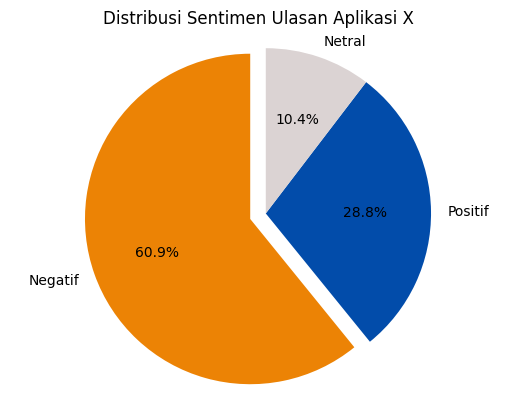

In [186]:
# Menghitung jumlah setiap kategori sentimen
sentimen_counts = ulasan_x['polarity'].value_counts().rename({2: 'Positif', 0: 'Negatif', 1: 'Netral'})

# Buat pie chart
colors = ['#EC8305', '#024CAA', '#DBD3D3']
explode = (0.1, 0, 0)

plt.pie(sentimen_counts, labels=sentimen_counts.index, autopct='%1.1f%%', startangle=90, colors=colors, explode=explode)
plt.title('Distribusi Sentimen Ulasan Aplikasi X')
plt.axis('equal')
plt.show()

In [187]:
# Mengatur opsi tampilan Pandas
pd.set_option('display.max_colwidth', 3000)

# Membuat DataFrame baru untuk tweet positif dan mengurutkannya
positive_tweets = ulasan_x[ulasan_x['polarity'] == 'positive'] \
                   .sort_values('polarity_score', ascending=False) \
                   [['text_akhir', 'polarity_score', 'polarity', 'text_stopword']] \
                   .reset_index(drop=True)

# Menambahkan 1 ke indeks
positive_tweets.index += 1

In [188]:
# Membuat DataFrame untuk tweet negatif
negative_tweets = ulasan_x[ulasan_x['polarity'] == 'negative'] \
                   .sort_values('polarity_score') \
                   [['text_akhir', 'polarity_score', 'polarity', 'text_stopword']] \
                   .reset_index(drop=True)
negative_tweets.index += 1

In [189]:
# Membuat DataFrame untuk tweet netral
neutral_tweets = ulasan_x[ulasan_x['polarity'] == 'neutral'] \
                   [['text_akhir', 'polarity_score', 'polarity', 'text_stopword']] \
                   .reset_index(drop=True)
neutral_tweets.index += 1

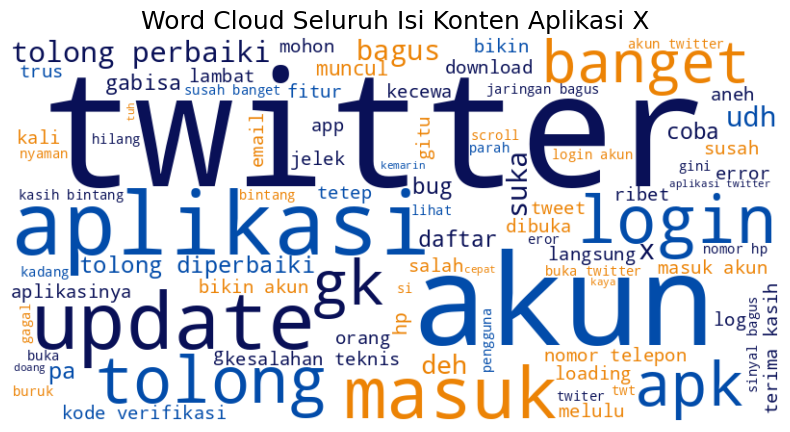

In [190]:
from wordcloud import WordCloud
import random

# Warna pilihan
colors = ['#EC8305', '#024CAA', '#091057']

# Fungsi untuk memilih warna acak dari daftar warna
def random_color_func(word=None, font_size=None, position=None, orientation=None, font_path=None, random_state=None):
    return random.choice(colors)

# Pastikan setiap elemen dalam 'text_stopword' adalah string
ulasan_x['text_stopword'] = ulasan_x['text_stopword'].apply(lambda x: ' '.join(x) if isinstance(x, list) else x)

# Menggabungkan semua kata dalam kolom 'text_stopword' menjadi satu string
all_words = ' '.join(ulasan_x['text_stopword'])

# Membuat objek WordCloud dengan fungsi warna
wordcloud = WordCloud(width=800, height=400, background_color='white', min_font_size=10, color_func=random_color_func).generate(all_words)

# Membuat plot
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud Seluruh Isi Konten Aplikasi X', fontsize=18)
plt.show()


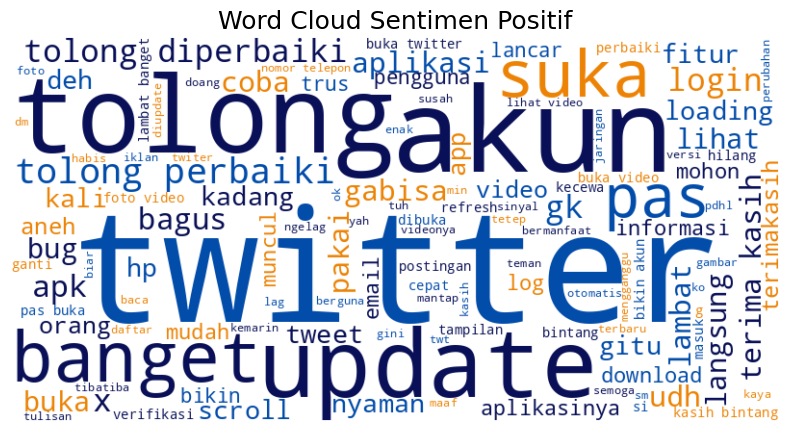

In [191]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import random

# Warna pilihan
colors = ['#EC8305', '#024CAA', '#091057']

# Fungsi untuk memilih warna acak dari daftar warna
def random_color_func(word=None, font_size=None, position=None, orientation=None, font_path=None, random_state=None):
    return random.choice(colors)

# Fungsi untuk membuat WordCloud dengan warna khusus
def generate_wordcloud(df, sentiment_label, title):
    # Filter data berdasarkan label sentimen
    text_data = ' '.join(df[df['polarity'] == sentiment_label]['text_stopword'])

    # Membuat objek WordCloud dengan color_func
    wordcloud = WordCloud(width=800, height=400, background_color='white', min_font_size=10, color_func=random_color_func).generate(text_data)

    # Plot WordCloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title, fontsize=18)
    plt.show()

# Membuat WordCloud untuk setiap kategori sentimen dengan warna khusus
generate_wordcloud(ulasan_x, 2, 'Word Cloud Sentimen Positif')   # Positif


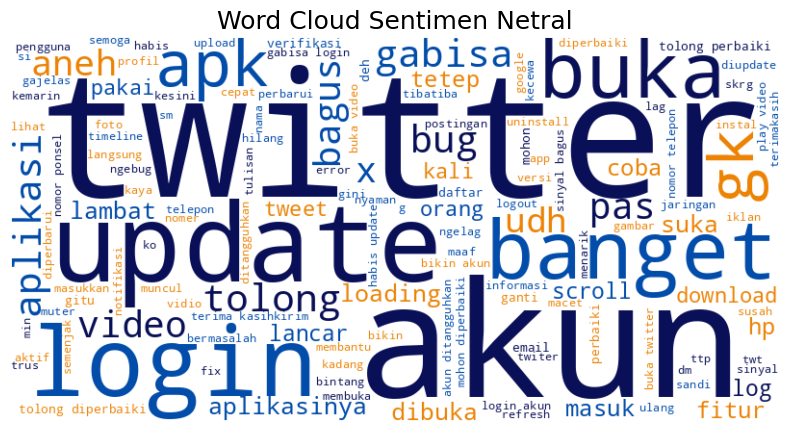

In [192]:
generate_wordcloud(ulasan_x, 1, 'Word Cloud Sentimen Netral')    # Netral

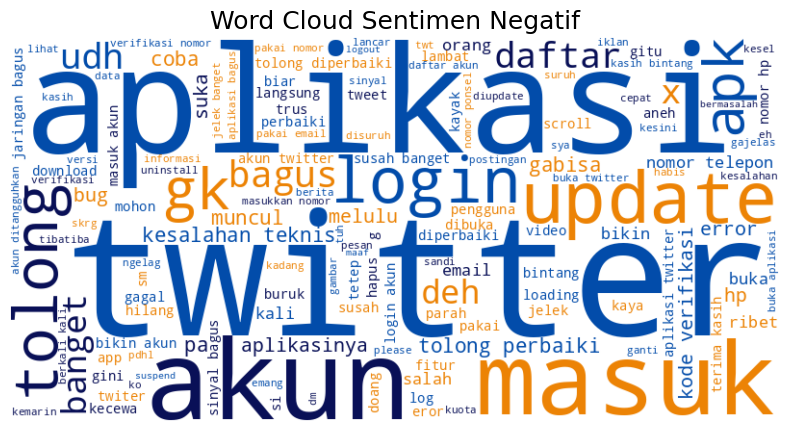

In [193]:
generate_wordcloud(ulasan_x, 0, 'Word Cloud Sentimen Negatif')   # Negatif

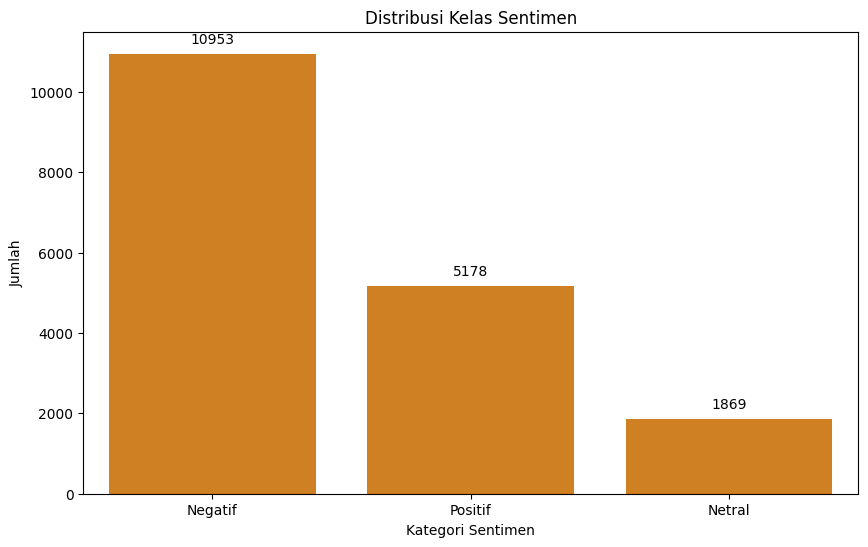

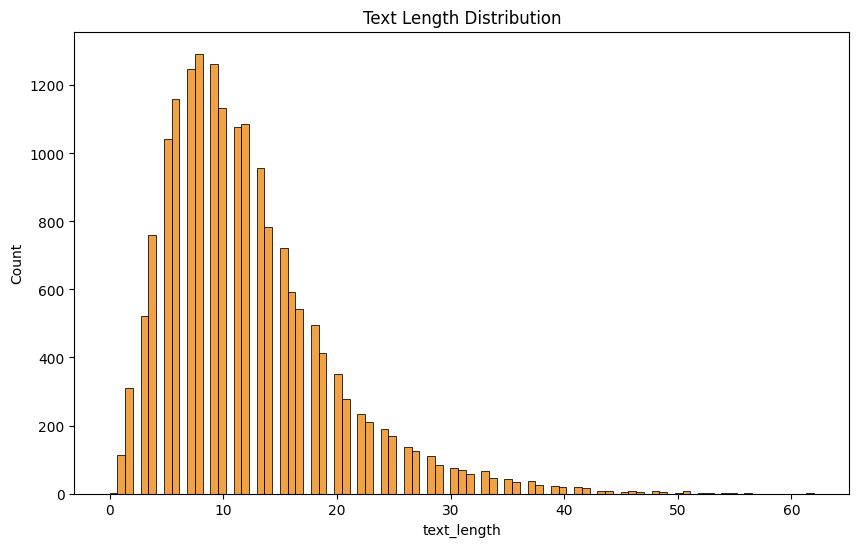

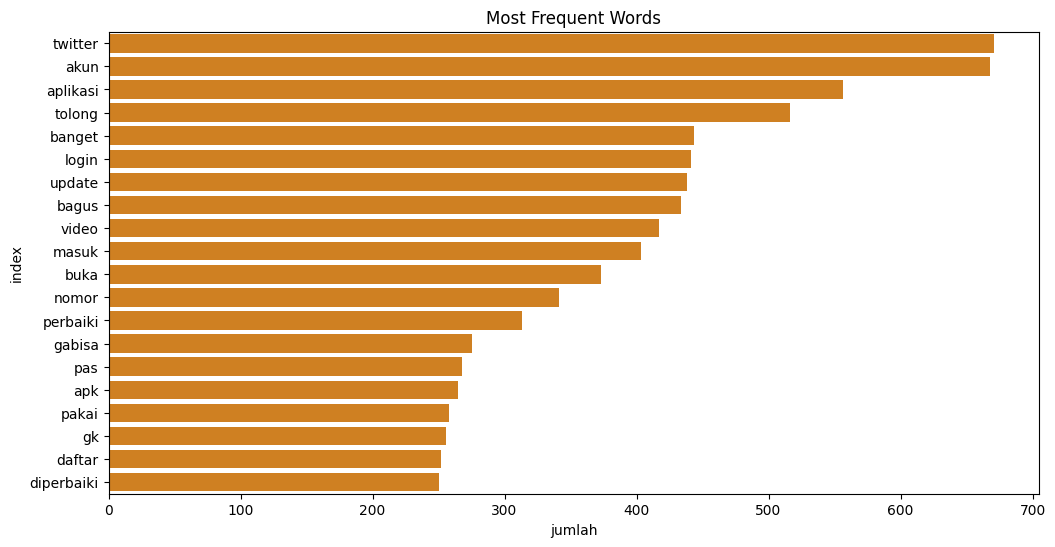

In [194]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

# Set ukuran figure dan warna untuk konsistensi
color = "#EC8305"

# Plot distribusi kelas
plt.figure(figsize=(10, 6))
ulasan_x['sentimen_label'] = ulasan_x['polarity'].replace({2: 'Positif', 0: 'Negatif', 1: 'Netral'})
class_dist_plot = sns.countplot(x='sentimen_label', data=ulasan_x, color=color)
plt.title('Distribusi Kelas Sentimen')

# Menambahkan jumlah di atas setiap bar
for p in class_dist_plot.patches:
    class_dist_plot.annotate(format(p.get_height(), '.0f'),
                             (p.get_x() + p.get_width() / 2., p.get_height()),
                             ha='center', va='center',
                             xytext=(0, 10),
                             textcoords='offset points')

plt.xlabel('Kategori Sentimen')
plt.ylabel('Jumlah')
plt.show()

# Plot distribusi panjang teks
plt.figure(figsize=(10, 6))
ulasan_x['text_length'] = ulasan_x['text_akhir'].apply(lambda x: len(x.split()))
sns.histplot(ulasan_x['text_length'], color=color)
plt.title('Text Length Distribution')
plt.show()

# Plot kata yang paling sering muncul
plt.figure(figsize=(12, 6))
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(ulasan_x['text_akhir'])

# Konversi hasil TF-IDF ke DataFrame dan hitung jumlah setiap kata
tfidf_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
tfidf_df = tfidf_df.sum().reset_index(name='jumlah')
tfidf_df = tfidf_df.sort_values('jumlah', ascending=False).head(20)

sns.barplot(x='jumlah', y='index', data=tfidf_df, color=color)
plt.title('Most Frequent Words')
plt.show()

### Data Splitting

In [195]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.feature_extraction.text import TfidfVectorizer

In [196]:
X = ulasan_x['text_akhir']
y = ulasan_x['polarity']

In [197]:
# Ekstraksi fitur dengan TF-IDF
tfidf = TfidfVectorizer(max_features=200, min_df=17, max_df=0.8 )
X_tfidf = tfidf.fit_transform(X)

In [198]:
# Konversi hasil ekstraksi fitur menjadi dataframe
features_df = pd.DataFrame(X_tfidf.toarray(), columns=tfidf.get_feature_names_out())

# Menampilkan hasil ekstraksi fitur
features_df

,aktif,akun,aman,aneh,apapun,apk,aplikasi,aplikasinya,app,baca,...,uninstall,update,upgrade,verifikasi,versi,video,videonya,vidio,wifi,yah
0,0.0,0.00000,0.0,0.339110,0.0,0.000000,0.000000,0.0,0.197767,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0
1,0.0,0.00000,0.0,0.155696,0.0,0.000000,0.099572,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.116508,0.0,0.0,0.185070,0.0
2,0.0,0.00000,0.0,0.000000,0.0,0.170718,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.448096,0.0,0.0,0.000000,0.0
3,0.0,0.00000,0.0,0.000000,0.0,0.294767,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0
4,0.0,0.00000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.149807,0.0,0.0,0.475933,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17995,0.0,0.00000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0
17996,0.0,0.00000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0
17997,0.0,0.00000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0
17998,0.0,0.19375,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0


In [233]:
# Bagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X_tfidf.toarray(), y, test_size=0.2, random_state=42)

print('Train Data Shape: ', X_train.shape, y_train.shape)
print('Test Data Shape: ', X_test.shape, y_test.shape)

Train Data Shape:  (14400, 1209) (14400,)
Test Data Shape:  (3600, 1209) (3600,)


## Pemodelan dengan 3 Algoritma

### 1. Model Logistik Regression

In [248]:
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)
y_pred_logistic = logistic_model.predict(X_test)

logistic_accuracy = accuracy_score(y_test, y_pred_logistic)
print("Logistic Regression:")
print("Accuracy:", logistic_accuracy)
print(classification_report(y_test, y_pred_logistic))

Logistic Regression:
Accuracy: 0.8486111111111111
              precision    recall  f1-score   support

           0       0.86      0.95      0.90      2195
           1       0.75      0.29      0.42       379
           2       0.83      0.84      0.84      1026

    accuracy                           0.85      3600
   macro avg       0.81      0.69      0.72      3600
weighted avg       0.84      0.85      0.83      3600



### 2. Model XGBoost

In [249]:
from xgboost import XGBClassifier

# Model 2 : XGBoost
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

xgb_accuracy = accuracy_score(y_test, y_pred_xgb)
print("XGBoost:")
print("Accuracy:", xgb_accuracy)
print(classification_report(y_test, y_pred_xgb))

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [06:25:33] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost:
Accuracy: 0.8125
              precision    recall  f1-score   support

           0       0.82      0.93      0.87      2195
           1       0.74      0.25      0.38       379
           2       0.81      0.76      0.79      1026

    accuracy                           0.81      3600
   macro avg       0.79      0.65      0.68      3600
weighted avg       0.81      0.81      0.79      3600



### Model Recurrent Neural Network (RNN)

In [250]:
#Buat Callback untuk model RNN
early_stopping = EarlyStopping(
    restore_best_weights=True,
    patience=3,
    min_delta=0.01,
    monitor='val_loss'
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=5,
    min_lr=0.0001
)

In [251]:
# Model 3 :RNN
rnn_model = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(512, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.4),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(3, activation='softmax')
])

rnn_model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss="sparse_categorical_crossentropy",
    metrics=['accuracy']
)

# Latih Model RNN
rnn_model.fit(
    X_train, y_train,
    epochs=20,
    batch_size=32,
    validation_data=(X_test, y_test),
    callbacks=[early_stopping, reduce_lr]
)

y_pred_test_rnn = rnn_model.predict(X_test).argmax(axis=1)
rnn_accuracy = accuracy_score(y_test, y_pred_test_rnn)
print("RNN:")
print("Accuracy:", rnn_accuracy)

Epoch 1/20
450/450 ━━━━━━━━━━━━━━━━━━━━ 12s 17ms/step - accuracy: 0.5683 - loss: 1.0182 - val_accuracy: 0.7883 - val_loss: 0.6785 - learning_rate: 0.0010
Epoch 2/20
450/450 ━━━━━━━━━━━━━━━━━━━━ 11s 20ms/step - accuracy: 0.7754 - loss: 0.5626 - val_accuracy: 0.8242 - val_loss: 0.4415 - learning_rate: 0.0010
Epoch 3/20
450/450 ━━━━━━━━━━━━━━━━━━━━ 8s 15ms/step - accuracy: 0.8292 - loss: 0.4457 - val_accuracy: 0.8342 - val_loss: 0.4257 - learning_rate: 0.0010
Epoch 4/20
450/450 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - accuracy: 0.8512 - loss: 0.3968 - val_accuracy: 0.8581 - val_loss: 0.3892 - learning_rate: 0.0010
Epoch 5/20
450/450 ━━━━━━━━━━━━━━━━━━━━ 10s 18ms/step - accuracy: 0.8729 - loss: 0.3563 - val_accuracy: 0.8508 - val_loss: 0.3972 - learning_rate: 0.0010
Epoch 6/20
450/450 ━━━━━━━━━━━━━━━━━━━━ 8s 18ms/step - accuracy: 0.8948 - loss: 0.3013 - val_accuracy: 0.8503 - val_loss: 0.4036 - learning_rate: 0.0010
Epoch 7/20
450/450 ━━━━━━━━━━━━━━━━━━━━ 11s 19ms/step - accuracy: 0.9012 - loss

In [253]:
# Mengurutkan hasil akurasi dari ketiga model
model_accuracies = {
    "Logistic Regression": logistic_accuracy,
    "XGBoost": xgb_accuracy,
    "RNN": rnn_accuracy
}

# Urutkan berdasarkan nilai akurasi secara menurun
sorted_accuracies = sorted(model_accuracies.items(), key=lambda x: x[1], reverse=True)

print("\nModel Accuracies in Descending Order:")
for model_name, accuracy in sorted_accuracies:
    print(f"{model_name}: {accuracy:.4f}")


Model Accuracies in Descending Order:
RNN: 0.8581
Logistic Regression: 0.8486
XGBoost: 0.8125


Dari ketiga model yang kita coba, model RNN yang paling akurat, mencapai 85,81% dibanding model logistik dan XGBoost.

## Testing

In [255]:
# Input kalimat baru dari pengguna
kalimat_baru = input("Masukkan kalimat baru: ")

# Melakukan preprocessing pada kalimat baru
kalimat_baru_cleaned = cleaningText(kalimat_baru)
kalimat_baru_casefolded = casefoldingText(kalimat_baru_cleaned)
kalimat_baru_slangfixed = fix_slangwords(kalimat_baru_casefolded)
kalimat_baru_tokenized = tokenizingText(kalimat_baru_slangfixed)
kalimat_baru_filtered = filteringText(kalimat_baru_tokenized)
kalimat_baru_final = toSentence(kalimat_baru_filtered)

# Menggunakan objek tfidf yang sudah di-fit dari pelatihan sebelumnya
X_kalimat_baru = tfidf.transform([kalimat_baru_final])

# Konversi data ke format array untuk digunakan oleh model RNN
X_kalimat_baru_array = X_kalimat_baru.toarray()

# Memperoleh prediksi sentimen kalimat baru menggunakan model RNN
prediksi_sentimen = rnn_model.predict(X_kalimat_baru_array)
prediksi_sentimen_label = prediksi_sentimen.argmax(axis=1)[0]

# Menentukan label sentimen berdasarkan prediksi
if prediksi_sentimen_label == 2:
    hasil_sentimen = "Positif"
elif prediksi_sentimen_label == 0:
    hasil_sentimen = "Negatif"
else:
    hasil_sentimen = "Netral"

# Menampilkan hasil prediksi sentimen
print(f"Hasil Klasifikasi Sentimen: {hasil_sentimen}")


Masukkan kalimat baru: twitter sekarang aplikasinya jelek banget cuk
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Hasil Klasifikasi Sentimen: Negatif
